<a href="https://colab.research.google.com/github/jonathannocek/pga-data-analysis/blob/master/pga_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PGA Data Analysis**
By: Jonathan Nocek

Date: November 2019











## **Overview**

As a collge golfer and Data Science minor at Illinois Wesleyan University, I want to marry two off my interests to examine the PGA Tour. 

## **Dataframe**

I have two different datasets that contain the statistics for PGA Tour players and the Illinois Wesleyan players respectively. Currently, I will only be working on the PGA Tour player dataset, but I do have future plans to incorporate college data to analyze college golf versus PGA Tour golf. 

The statistics for the PGA Tour players were collected through a data scraping notebook that accesses the data from the [PGA Tour](https://www.pgatour.com/stats.html). The archives provide hundreds of statistics for the past seasons. I have selected a variety of statistics and have selected to utilize the 2010-2019 PGA Tour seasons. I modified [this](https://github.com/daronprater/PGA-Tour-Data-Science-Project/blob/master/PGAtour.com%20Web%20Scraper.ipynb) notebook to collect these statistics.

### **Variables**
Descriptions taken from the PGA TOUR's website. The Strokes Gained concept can confusing so [here](https://www.pgatour.com/news/2016/05/31/strokes-gained-defined.html) is a detailed explanation of the statistic. It has revolutionized golf statistics and has provided significant insight as to how a player analyzes their game. 

The Strokes Gained - concept is a by-product of the PGA TOUR's ShotLink Intelligence Program, which encourages academics to perform research against ShotLink statistical data. Professor Mark Broadie from Columbia Business School developed the early concept which was later refined by the TOUR.

*   **NAME** - The name of the golfer
*   **ROUNDS** - The number of rounds played in the given season
*   **SCORING** - The weighted scoring average which takes the stroke average of the field into account. It is computed by adding a player's total strokes to an adjustment and dividing by the total rounds played. The adjustment is computed by determining the stroke average of the field for each round played. This average is subtracted from par to create an adjustment for each round. A player accumulates these adjustments for each round played.
*   **DRIVE_DISTANCE** - The average number of yards per measured drive. These drives are measured on two holes per round. Care is taken to select two holes which face in opposite directions to counteract the effect of wind. Drives are measured to the point at which they come to rest regardless of whether they are in the fairway or not 
*   **FWY_%** - The percentage of time a tee shot comes to rest in the fairway (regardless of club).
*   **GIR_%** - The percent of time a player was able to hit the green in regulation (greens hit in regulation/holes played). Note: A green is considered hit in regulation if any portion of the ball is touching the putting surface after the GIR stroke has been taken. (The GIR stroke is determined by subtracting 2 from par (1st stroke on a par 3, 2nd on a par 4, 3rd on a par 5))
*   **SG_P (Strokes Gained Putting)** - The number of putts a player takes from a specific distance is measured against a statistical baseline to determine the player's strokes gained or lost on a hole. The sum of the values for all holes played in a round minus the field average strokes gained/lost for the round is the player's Strokes gained/lost for that round. The sum of strokes gained for each round are divided by total rounds played. 
*   **SG_ATG (Strokes Gained Around the Green)** - The number of Around the Green strokes a player takes from specific locations and distances are measured against a statistical baseline to determine the player's strokes gained or lost on a hole. 
*   **SG_APP (Strokes Gained Approach)** - The number of Approach the Green strokes a player takes from specific locations and distances are measured against a statistical baseline to determine the player's strokes gained or lost on a hole. 
*   **SG_OTT (Strokes Gained Off the Tee)** - The number of strokes a player takes from a specific distance off the tee on Par 4 & par 5's is measured against a statistical baseline to determine the player's strokes gained or lost off the tee on a hole. 
*   **SG_TTG (Strokes Gained Tee to Green)** - The per round average of the number of Strokes the player was better or worse than the field average on the same course & event minus the Players Strokes Gained putting value. 
*   **SG_T (Strokes Gained Total)** - The per round average of the number of Strokes the player was better or worse than the field average on the same course & event.
*   **PAR3 (Par 3 Scoring)** - The average score on all par 3's played (e.g. 3.22)
*   **PAR4 (Par 4 Scoring)** - The average score on all par 4's played (e.g. 4.22)
*   **PAR5 (Par 5 Scoring)** - The average score on all par 5's played (e.g. 5.22)
*   **POINTS** - Total number of FedEx Cup points
*   **TOP 10** - The number of top 10 finishes
*   **1ST** - The number of tournaments won
*   **YEAR** - The year of the season for the statistics

## **Questions**

* Which statistics predictors have the largest effect on scoring average on the PGA Tour?
* What is the difference between a great season on TOUR, an average season, and a poor season? Where do these differences come from?
* What has changed on TOUR over the last ten years (2010-2019)?  
* Do case studies on specific players games. Examine breakout years for Jordan Spieth, Justin Thomas, etc.  
* How has the driving distance on TOUR changed 


# **Installation**

The following installs the necessary packages and collects the dataset from your Google Drive. The dataset will be publically available on my [Github](https://github.com/jonathannocek/pga-data-analysis/tree/master).

In [28]:
# Importing necessary packages
import pandas as pd
import numpy
import seaborn as sns
import matplotlib.pyplot as plt

# Downloading dataset
from google.colab import drive
# Will prompt for authentication
drive.mount('/content/drive')

# Using pandas to create dataframe by reading csv from my google drive
df_iwu = pd.read_csv('drive/My Drive/2017_2019_IWU_Stats.csv')
df_pga = pd.read_csv('drive/My Drive/2010_2019_PGA_Stats.csv')
df_kaggle = pd.read_csv('drive/My Drive/PGA_Data_Historical.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **General Descriptives**

In [29]:
df_pga.head()

,Unnamed: 0,NAME,ROUNDS,SCORING,DRIVE_DISTANCE,FWY_%,GIR_%,SG_P,SG_ATG,SG_APP,SG_OTT,SG_TTG,SG_T,PAR3,PAR4,PAR5,POINTS,TOP 10,1ST,Year
0,0,Matt Kuchar,97,69.606,286.9,67.89,69.36,0.648,0.334,0.336,0.158,0.827,1.461,3.02,3.96,4.56,"2,728",11.0,1.0,2010
1,1,Steve Stricker,73,69.660,282.9,68.50,68.29,0.437,0.419,0.773,0.191,1.383,1.818,2.99,3.99,4.58,"2,028",9.0,2.0,2010
2,2,Retief Goosen,75,69.718,291.4,64.79,65.96,0.679,0.395,0.185,0.337,0.917,1.598,3.04,3.99,4.60,"1,360",10.0,NaN,2010
3,3,Paul Casey,64,69.720,294.2,61.31,68.68,0.812,-0.111,0.483,0.215,0.587,1.411,3.03,3.98,4.64,"2,250",7.0,NaN,2010
4,4,Jim Furyk,76,69.828,276.0,71.01,67.12,0.402,0.367,0.641,0.150,1.159,1.564,3.02,3.99,4.70,"2,980",7.0,3.0,2010


In [30]:
df_pga.describe().round(2)

,Unnamed: 0,ROUNDS,SCORING,DRIVE_DISTANCE,FWY_%,GIR_%,SG_P,SG_ATG,SG_APP,SG_OTT,SG_TTG,SG_T,PAR3,PAR4,PAR5,TOP 10,1ST,Year
count,1866.00,1866.00,1866.00,1866.00,1866.00,1866.00,1866.00,1866.00,1866.00,1866.00,1866.00,1866.00,1866.00,1866.00,1866.00,1540.00,346.00,1866.00
mean,92.87,78.54,70.93,291.19,61.56,65.76,0.03,0.02,0.06,0.04,0.12,0.15,3.06,4.05,4.67,3.25,1.27,2014.51
std,53.99,14.11,0.70,8.94,5.07,2.72,0.34,0.22,0.38,0.38,0.64,0.70,0.04,0.04,0.07,2.31,0.67,2.89
min,0.00,45.00,68.70,266.40,43.02,53.54,-1.48,-0.93,-1.68,-1.72,-3.34,-3.21,2.93,3.93,4.42,1.00,1.00,2010.00
25%,46.00,69.00,70.50,285.20,58.04,63.96,-0.19,-0.12,-0.18,-0.18,-0.26,-0.25,3.03,4.02,4.62,1.00,1.00,2012.00
50%,93.00,79.00,70.91,290.90,61.54,65.93,0.04,0.02,0.08,0.06,0.14,0.15,3.06,4.04,4.67,3.00,1.00,2015.00
75%,139.00,89.00,71.35,296.80,65.06,67.66,0.26,0.18,0.31,0.29,0.52,0.57,3.09,4.07,4.71,4.00,1.00,2017.00
max,192.00,122.00,74.40,319.70,76.88,73.52,1.13,0.66,1.53,1.48,2.35,2.55,3.22,4.25,4.93,15.00,5.00,2019.00


In [32]:
df_pga.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1866 entries, 0 to 1865
Data columns (total 20 columns):
Unnamed: 0        1866 non-null int64
NAME              1866 non-null object
ROUNDS            1866 non-null int64
SCORING           1866 non-null float64
DRIVE_DISTANCE    1866 non-null float64
FWY_%             1866 non-null float64
GIR_%             1866 non-null float64
SG_P              1866 non-null float64
SG_ATG            1866 non-null float64
SG_APP            1866 non-null float64
SG_OTT            1866 non-null float64
SG_TTG            1866 non-null float64
SG_T              1866 non-null float64
PAR3              1866 non-null float64
PAR4              1866 non-null float64
PAR5              1866 non-null float64
POINTS            1861 non-null object
TOP 10            1540 non-null float64
1ST               346 non-null float64
Year              1866 non-null int64
dtypes: float64(15), int64(3), object(2)
memory usage: 291.7+ KB


The missing values below are okay. This simply means that the players with a nan value did not finish inside the top or win a golf tournament in the given year. 

In [33]:
df_pga.isna().sum()

Unnamed: 0           0
NAME                 0
ROUNDS               0
SCORING              0
DRIVE_DISTANCE       0
FWY_%                0
GIR_%                0
SG_P                 0
SG_ATG               0
SG_APP               0
SG_OTT               0
SG_TTG               0
SG_T                 0
PAR3                 0
PAR4                 0
PAR5                 0
POINTS               5
TOP 10             326
1ST               1520
Year                 0
dtype: int64

# **Data Cleaning**

One problem with the data set above is that it contains an extra column from the key in the csv file. We can simply drop this column entirely.

In [0]:
df_pga = df_pga.drop('Unnamed: 0', 1) # Drop leftover column with old key

As shown above, whenever a player did not win an event or finish inside the top 10 in a given season, the were given a blank or NaN. Here, we are going to replace all of these instances with a 0. 

In [35]:
#Replace null and blank values with '0'
df_pga.fillna('0', inplace=True)
df_pga.replace('', '0', inplace=True)
df_pga.head()

,NAME,ROUNDS,SCORING,DRIVE_DISTANCE,FWY_%,GIR_%,SG_P,SG_ATG,SG_APP,SG_OTT,SG_TTG,SG_T,PAR3,PAR4,PAR5,POINTS,TOP 10,1ST,Year
0,Matt Kuchar,97,69.606,286.9,67.89,69.36,0.648,0.334,0.336,0.158,0.827,1.461,3.02,3.96,4.56,"2,728",11,1,2010
1,Steve Stricker,73,69.660,282.9,68.50,68.29,0.437,0.419,0.773,0.191,1.383,1.818,2.99,3.99,4.58,"2,028",9,2,2010
2,Retief Goosen,75,69.718,291.4,64.79,65.96,0.679,0.395,0.185,0.337,0.917,1.598,3.04,3.99,4.60,"1,360",10,0,2010
3,Paul Casey,64,69.720,294.2,61.31,68.68,0.812,-0.111,0.483,0.215,0.587,1.411,3.03,3.98,4.64,"2,250",7,0,2010
4,Jim Furyk,76,69.828,276.0,71.01,67.12,0.402,0.367,0.641,0.150,1.159,1.564,3.02,3.99,4.70,"2,980",7,3,2010


As shown below, all of the NaN values are now replaced with 0s. 

In [36]:
df_pga.isna().sum()

NAME              0
ROUNDS            0
SCORING           0
DRIVE_DISTANCE    0
FWY_%             0
GIR_%             0
SG_P              0
SG_ATG            0
SG_APP            0
SG_OTT            0
SG_TTG            0
SG_T              0
PAR3              0
PAR4              0
PAR5              0
POINTS            0
TOP 10            0
1ST               0
Year              0
dtype: int64

Check datatypes again. Points, Top 10, and 1st are still objects

In [37]:
df_pga.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1866 entries, 0 to 1865
Data columns (total 19 columns):
NAME              1866 non-null object
ROUNDS            1866 non-null int64
SCORING           1866 non-null float64
DRIVE_DISTANCE    1866 non-null float64
FWY_%             1866 non-null float64
GIR_%             1866 non-null float64
SG_P              1866 non-null float64
SG_ATG            1866 non-null float64
SG_APP            1866 non-null float64
SG_OTT            1866 non-null float64
SG_TTG            1866 non-null float64
SG_T              1866 non-null float64
PAR3              1866 non-null float64
PAR4              1866 non-null float64
PAR5              1866 non-null float64
POINTS            1866 non-null object
TOP 10            1866 non-null object
1ST               1866 non-null object
Year              1866 non-null int64
dtypes: float64(13), int64(2), object(4)
memory usage: 277.1+ KB


In [0]:
#Convert the following columns from object to float
df_pga['POINTS'] = df_pga['POINTS'].apply(pd.to_numeric, errors='coerce')
df_pga['TOP 10'] = df_pga['TOP 10'].apply(pd.to_numeric, errors='coerce')
df_pga['1ST'] = df_pga['1ST'].apply(pd.to_numeric, errors='coerce')
# Fillna
df_pga.fillna('0', inplace=True)
df_pga['POINTS'] = df_pga['POINTS'].apply(pd.to_numeric, errors='ignore')

In [39]:
df_pga.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1866 entries, 0 to 1865
Data columns (total 19 columns):
NAME              1866 non-null object
ROUNDS            1866 non-null int64
SCORING           1866 non-null float64
DRIVE_DISTANCE    1866 non-null float64
FWY_%             1866 non-null float64
GIR_%             1866 non-null float64
SG_P              1866 non-null float64
SG_ATG            1866 non-null float64
SG_APP            1866 non-null float64
SG_OTT            1866 non-null float64
SG_TTG            1866 non-null float64
SG_T              1866 non-null float64
PAR3              1866 non-null float64
PAR4              1866 non-null float64
PAR5              1866 non-null float64
POINTS            1866 non-null float64
TOP 10            1866 non-null float64
1ST               1866 non-null float64
Year              1866 non-null int64
dtypes: float64(16), int64(2), object(1)
memory usage: 277.1+ KB


In [40]:
df_pga.isna().sum()

NAME              0
ROUNDS            0
SCORING           0
DRIVE_DISTANCE    0
FWY_%             0
GIR_%             0
SG_P              0
SG_ATG            0
SG_APP            0
SG_OTT            0
SG_TTG            0
SG_T              0
PAR3              0
PAR4              0
PAR5              0
POINTS            0
TOP 10            0
1ST               0
Year              0
dtype: int64

# **Combining Datasets**

Combining statistics I want from the kaggle dataset with the PGA dataset from the data scraping notebook. I used [this notebook](https://www.kaggle.com/mesadowski/moneyball-golf-scikit-learn-and-tf-estimator-api) to help clean the kaggle dataset. 

In [41]:
df_kaggle.head()

,Player Name,Season,Statistic,Variable,Value
0,Robert Garrigus,2010,Driving Distance,Driving Distance - (ROUNDS),71
1,Bubba Watson,2010,Driving Distance,Driving Distance - (ROUNDS),77
2,Dustin Johnson,2010,Driving Distance,Driving Distance - (ROUNDS),83
3,Brett Wetterich,2010,Driving Distance,Driving Distance - (ROUNDS),54
4,J.B. Holmes,2010,Driving Distance,Driving Distance - (ROUNDS),100


In [42]:
df_kaggle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2740403 entries, 0 to 2740402
Data columns (total 5 columns):
Player Name    object
Season         int64
Statistic      object
Variable       object
Value          object
dtypes: int64(1), object(4)
memory usage: 104.5+ MB


Listing out all of the statistics in the Kaggle dataset, I went through and found the ones that would be useful for my project.
- Player Name
- Season 
- Birdie Average
- World Money List
- Bounce Back
- GIR Percentage - 200+ yards
- GIR Percentage - 175-200 yards
- GIR Percentage - 150-175 yards
- GIR Percentage - 125-150 yards
- GIR Percentage - < 125 yards
- Club Head Speed
- Ball Speed
- Smash Factor
- Bogey Average
- Launch Angle
- Spin Rate

In [0]:
df_pga_kaggle = df_kaggle.set_index(['Player Name', 'Variable', 'Season'])['Value'].unstack('Variable').reset_index()

In [44]:
df_pga_kaggle.columns

Index(['Player Name', 'Season',
       '% of Potential Pts won - FedExCup Playoffs - (# OF TOP 10'S)',
       '% of Potential Pts won - FedExCup Playoffs - (# OF WINS)',
       '% of Potential Pts won - FedExCup Playoffs - (%)',
       '% of Potential Pts won - FedExCup Playoffs - (EVENTS)',
       '% of Potential Pts won - FedExCup Playoffs - (PLAYOFF POINTS WON)',
       '% of Potential Pts won - FedExCup Playoffs - (POTENTIAL PTS)',
       '% of Potential Pts won - FedExCup Regular Season - (# OF TOP 10'S)',
       '% of Potential Pts won - FedExCup Regular Season - (# OF WINS)',
       ...
       'Total Money (Official and Unofficial) - (EVENTS)',
       'Total Money (Official and Unofficial) - (MONEY)',
       'Total Putting - (EVENTS)', 'Total Putting - (TOTAL)',
       'Victory Leaders - (EVENTS)', 'Victory Leaders - (VICTORIES)',
       'World Golf Ranking Points - (EVENTS)',
       'World Golf Ranking Points - (POINTS)', 'World Money List - (EVENTS)',
       'World Money List 

In [45]:
keep_columns = ['Player Name','Season','Birdie Average - (AVG)', 'Bogey Average - (AVERAGE BOGEYS PER ROUND)', 'Total Money (Official and Unofficial) - (MONEY)','Bounce Back - (%)','GIR Percentage - 200+ yards - (%)','GIR Percentage - 175-200 yards - (%)',
                'GIR Percentage - 150-175 yards - (%)','GIR Percentage - 125-150 yards - (%)','GIR Percentage - < 125 yards - (%)','Club Head Speed - (AVG.)',
                'Ball Speed - (AVG.)','Smash Factor - (AVG.)','Launch Angle - (AVG.)','Spin Rate - (AVG.)']
keep_columns

['Player Name',
 'Season',
 'Birdie Average - (AVG)',
 'Bogey Average - (AVERAGE BOGEYS PER ROUND)',
 'Total Money (Official and Unofficial) - (MONEY)',
 'Bounce Back - (%)',
 'GIR Percentage - 200+ yards - (%)',
 'GIR Percentage - 175-200 yards - (%)',
 'GIR Percentage - 150-175 yards - (%)',
 'GIR Percentage - 125-150 yards - (%)',
 'GIR Percentage - < 125 yards - (%)',
 'Club Head Speed - (AVG.)',
 'Ball Speed - (AVG.)',
 'Smash Factor - (AVG.)',
 'Launch Angle - (AVG.)',
 'Spin Rate - (AVG.)']

In [51]:
df_pga2 = df_pga_kaggle[keep_columns].dropna()
df_pga2.rename(columns = {'Player Name':'NAME'}, inplace = True)
df_pga2.rename(columns = {'Season':'Year'}, inplace = True)
df_pga2.rename(columns = {'Birdie Average - (AVG)':'Birdie Average'}, inplace = True)
df_pga2.rename(columns = {'Bogey Average - (AVERAGE BOGEYS PER ROUND)':'Bogey Average'}, inplace = True)
df_pga2.rename(columns = {'Total Money (Official and Unofficial) - (MONEY)':'Money'}, inplace = True)
df_pga2.rename(columns = {'Bounce Back - (%)':'BB_%'}, inplace = True)
df_pga2.rename(columns = {'GIR Percentage - 200+ yards - (%)':'GIR_%_200+'}, inplace=True)
df_pga2.rename(columns = {'GIR Percentage - 175-200 yards - (%)':'GIR_%_175-200'}, inplace=True)
df_pga2.rename(columns = {'GIR Percentage - 150-175 yards - (%)':'GIR_%_150-175'}, inplace=True)
df_pga2.rename(columns = {'GIR Percentage - 125-150 yards - (%)':'GIR_%_125-150'}, inplace=True)
df_pga2.rename(columns = {'GIR Percentage - < 125 yards - (%)':'GIR_%_<125'}, inplace=True)
df_pga2.rename(columns = {'Club Head Speed - (AVG.)':'Club Head Speed'}, inplace=True)
df_pga2.rename(columns = {'Ball Speed - (AVG.)':'Ball Speed'}, inplace=True)
df_pga2.rename(columns = {'Smash Factor - (AVG.)':'Smash Factor'}, inplace=True)
df_pga2.rename(columns = {'Launch Angle - (AVG.)':'Launch Angle'}, inplace=True)
df_pga2.rename(columns = {'Spin Rate - (AVG.)':'Spin Rate'}, inplace=True)
df_pga2

Variable,NAME,Year,Birdie Average,Bogey Average,Money,BB_%,GIR_%_200+,GIR_%_175-200,GIR_%_150-175,GIR_%_125-150,GIR_%_<125,Club Head Speed,Ball Speed,Smash Factor,Launch Angle,Spin Rate
1,Aaron Baddeley,2010,3.76,2.53,"879,317",27.72,41.41,53.78,59.21,68.82,84.16,119.95,177.01,1.476,9.49,"2,988.3"
2,Aaron Baddeley,2011,4.08,2.62,"$3,157,193",26.15,41.10,56.98,61.29,75.71,83.84,119.14,176.34,1.480,8.59,"2,984.6"
3,Aaron Baddeley,2012,3.51,2.97,"$1,215,753",18.97,35.25,51.25,58.67,57.69,73.67,119.05,176.75,1.485,9.04,"3,096.0"
4,Aaron Baddeley,2013,3.50,3.12,"$721,024",21.52,33.08,46.83,54.94,64.67,77.33,118.89,176.32,1.483,9.08,"2,959.4"
5,Aaron Baddeley,2014,3.54,2.79,"$942,559",20.36,31.58,50.23,61.54,69.05,79.41,117.54,174.49,1.485,9.57,"2,930.4"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11176,Zach Johnson,2016,3.65,2.58,"$1,904,953",19.56,46.34,55.39,64.34,73.13,83.74,106.13,158.62,1.494,13.40,"2,284.7"
11177,Zach Johnson,2017,3.53,2.70,"$2,472,968",16.75,49.08,48.09,66.67,71.64,80.20,108.36,161.46,1.490,13.15,"2,350.8"
11178,Zach Johnson,2018,3.86,2.33,"$2,045,135",20.67,49.40,58.09,66.44,76.65,79.89,110.00,164.14,1.492,12.30,"2,548.7"
11196,Zack Miller,2011,3.31,3.27,"$427,341",18.60,38.59,53.18,58.55,64.73,77.81,120.78,177.44,1.469,10.30,"2,799.8"


In [61]:
df_pga.set_index(['NAME', 'Year'])

,,ROUNDS,SCORING,DRIVE_DISTANCE,FWY_%,GIR_%,SG_P,SG_ATG,SG_APP,SG_OTT,SG_TTG,SG_T,PAR3,PAR4,PAR5,POINTS,TOP 10,1ST
NAME,Year,,,,,,,,,,,,,,,,,
Matt Kuchar,2010,97,69.606,286.9,67.89,69.36,0.648,0.334,0.336,0.158,0.827,1.461,3.02,3.96,4.56,0.0,11.0,1.0
Steve Stricker,2010,73,69.660,282.9,68.50,68.29,0.437,0.419,0.773,0.191,1.383,1.818,2.99,3.99,4.58,0.0,9.0,2.0
Retief Goosen,2010,75,69.718,291.4,64.79,65.96,0.679,0.395,0.185,0.337,0.917,1.598,3.04,3.99,4.60,0.0,10.0,0.0
Paul Casey,2010,64,69.720,294.2,61.31,68.68,0.812,-0.111,0.483,0.215,0.587,1.411,3.03,3.98,4.64,0.0,7.0,0.0
Jim Furyk,2010,76,69.828,276.0,71.01,67.12,0.402,0.367,0.641,0.150,1.159,1.564,3.02,3.99,4.70,0.0,7.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Martin Trainer,2019,63,72.343,303.8,50.76,60.47,-0.041,0.063,-1.378,-0.075,-1.390,-1.431,3.18,4.09,4.65,354.0,1.0,1.0
Whee Kim,2019,73,72.474,284.3,62.07,66.18,0.042,-0.080,-0.217,-1.035,-1.332,-1.290,3.06,4.09,4.70,118.0,1.0,0.0
John Chin,2019,58,72.485,300.0,58.15,68.72,-0.318,-0.366,-0.760,-0.112,-1.237,-1.555,3.11,4.07,4.66,140.0,1.0,0.0


In [60]:
df_pga2.set_index(['NAME','Year'])

Variable            Birdie Average Bogey Average  ... Launch Angle Spin Rate
NAME           Year                               ...                       
Aaron Baddeley 2010           3.76          2.53  ...         9.49   2,988.3
               2011           4.08          2.62  ...         8.59   2,984.6
               2012           3.51          2.97  ...         9.04   3,096.0
               2013           3.50          3.12  ...         9.08   2,959.4
               2014           3.54          2.79  ...         9.57   2,930.4
...                            ...           ...  ...          ...       ...
Zach Johnson   2016           3.65          2.58  ...        13.40   2,284.7
               2017           3.53          2.70  ...        13.15   2,350.8
               2018           3.86          2.33  ...        12.30   2,548.7
Zack Miller    2011           3.31          3.27  ...        10.30   2,799.8
Zecheng Dou    2018           3.14          3.37  ...        11.04   2,772.3

[1678 rows x 14 columns]

In [74]:
# Left merge on the multiindex NAME, Year
df = pd.merge(df_pga, df_pga2,  how='left', left_on=['NAME','Year'], right_on = ['NAME','Year'])
df

,NAME,ROUNDS,SCORING,DRIVE_DISTANCE,FWY_%,GIR_%,SG_P,SG_ATG,SG_APP,SG_OTT,SG_TTG,SG_T,PAR3,PAR4,PAR5,POINTS,TOP 10,1ST,Year,Birdie Average,Bogey Average,Money,BB_%,GIR_%_200+,GIR_%_175-200,GIR_%_150-175,GIR_%_125-150,GIR_%_<125,Club Head Speed,Ball Speed,Smash Factor,Launch Angle,Spin Rate
0,Matt Kuchar,97,69.606,286.9,67.89,69.36,0.648,0.334,0.336,0.158,0.827,1.461,3.02,3.96,4.56,0.0,11.0,1.0,2010,3.97,2.09,"5,180,477",21.67,51.79,57.68,68.52,72.30,85.24,110.76,163.46,1.476,10.77,"2,488.8"
1,Steve Stricker,73,69.660,282.9,68.50,68.29,0.437,0.419,0.773,0.191,1.383,1.818,2.99,3.99,4.58,0.0,9.0,2.0,2010,3.89,2.18,"4,485,235",17.72,51.25,57.00,70.93,79.73,83.33,111.18,164.25,1.477,11.10,"2,673.7"
2,Retief Goosen,75,69.718,291.4,64.79,65.96,0.679,0.395,0.185,0.337,0.917,1.598,3.04,3.99,4.60,0.0,10.0,0.0,2010,3.75,2.13,"3,595,803",20.63,50.00,58.94,63.21,71.61,81.14,115.32,170.77,1.481,10.59,"2,780.9"
3,Paul Casey,64,69.720,294.2,61.31,68.68,0.812,-0.111,0.483,0.215,0.587,1.411,3.03,3.98,4.64,0.0,7.0,0.0,2010,3.88,2.21,"4,158,908",18.66,52.38,64.58,66.67,69.54,81.02,119.37,176.24,1.476,10.31,"2,594.3"
4,Jim Furyk,76,69.828,276.0,71.01,67.12,0.402,0.367,0.641,0.150,1.159,1.564,3.02,3.99,4.70,0.0,7.0,3.0,2010,3.64,2.31,"4,984,622",22.54,45.30,63.18,66.52,73.05,84.00,108.83,160.67,1.476,10.02,"2,674.5"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1861,Martin Trainer,63,72.343,303.8,50.76,60.47,-0.041,0.063,-1.378,-0.075,-1.390,-1.431,3.18,4.09,4.65,354.0,1.0,1.0,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1862,Whee Kim,73,72.474,284.3,62.07,66.18,0.042,-0.080,-0.217,-1.035,-1.332,-1.290,3.06,4.09,4.70,118.0,1.0,0.0,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1863,John Chin,58,72.485,300.0,58.15,68.72,-0.318,-0.366,-0.760,-0.112,-1.237,-1.555,3.11,4.07,4.66,140.0,1.0,0.0,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1864,Satoshi Kodaira,67,72.780,282.3,67.63,63.54,-0.504,-0.414,-0.399,-0.311,-1.124,-1.628,3.16,4.09,4.75,141.0,0.0,0.0,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The new dataset contains many objects that we will need to convert to numerics.

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1866 entries, 0 to 1865
Data columns (total 33 columns):
NAME               1866 non-null object
ROUNDS             1866 non-null int64
SCORING            1866 non-null float64
DRIVE_DISTANCE     1866 non-null float64
FWY_%              1866 non-null float64
GIR_%              1866 non-null float64
SG_P               1866 non-null float64
SG_ATG             1866 non-null float64
SG_APP             1866 non-null float64
SG_OTT             1866 non-null float64
SG_TTG             1866 non-null float64
SG_T               1866 non-null float64
PAR3               1866 non-null float64
PAR4               1866 non-null float64
PAR5               1866 non-null float64
POINTS             1866 non-null float64
TOP 10             1866 non-null float64
1ST                1866 non-null float64
Year               1866 non-null int64
Birdie Average     1657 non-null object
Bogey Average      1657 non-null object
Money              1657 non-null object

In [76]:
# Remove commas and dollar signs so pd.to_numeric works
df['Money']= df['Money'].str.replace('$','')
df['Money']= df['Money'].str.replace(',','')
df['Spin Rate'] = df['Spin Rate'].str.replace(',','')

# Columns we want to convert to numeric
change_columns = ['Birdie Average', 'Bogey Average', 'Money','BB_%','GIR_%_200+','GIR_%_175-200',
                'GIR_%_150-175','GIR_%_125-150','GIR_%_<125','Club Head Speed',
                'Ball Speed','Smash Factor','Launch Angle','Spin Rate']

for col in change_columns:
  df[col] = df[col].apply(pd.to_numeric, errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1866 entries, 0 to 1865
Data columns (total 33 columns):
NAME               1866 non-null object
ROUNDS             1866 non-null int64
SCORING            1866 non-null float64
DRIVE_DISTANCE     1866 non-null float64
FWY_%              1866 non-null float64
GIR_%              1866 non-null float64
SG_P               1866 non-null float64
SG_ATG             1866 non-null float64
SG_APP             1866 non-null float64
SG_OTT             1866 non-null float64
SG_TTG             1866 non-null float64
SG_T               1866 non-null float64
PAR3               1866 non-null float64
PAR4               1866 non-null float64
PAR5               1866 non-null float64
POINTS             1866 non-null float64
TOP 10             1866 non-null float64
1ST                1866 non-null float64
Year               1866 non-null int64
Birdie Average     1657 non-null float64
Bogey Average      1657 non-null float64
Money              1657 non-null floa

In [89]:
df = df.dropna()
df.isna().sum()

NAME               0
ROUNDS             0
SCORING            0
DRIVE_DISTANCE     0
FWY_%              0
GIR_%              0
SG_P               0
SG_ATG             0
SG_APP             0
SG_OTT             0
SG_TTG             0
SG_T               0
PAR3               0
PAR4               0
PAR5               0
POINTS             0
TOP 10             0
1ST                0
Year               0
Birdie Average     0
Bogey Average      0
Money              0
BB_%               0
GIR_%_200+         0
GIR_%_175-200      0
GIR_%_150-175      0
GIR_%_125-150      0
GIR_%_<125         0
Club Head Speed    0
Ball Speed         0
Smash Factor       0
Launch Angle       0
Spin Rate          0
dtype: int64

In [90]:
# Creating PGA Average dataset
df_mean = pd.DataFrame()
df_mean['PGA_AVG'] = df.mean()
df_mean.transpose().round(2)

,ROUNDS,SCORING,DRIVE_DISTANCE,FWY_%,GIR_%,SG_P,SG_ATG,SG_APP,SG_OTT,SG_TTG,SG_T,PAR3,PAR4,PAR5,POINTS,TOP 10,1ST,Year,Birdie Average,Bogey Average,Money,BB_%,GIR_%_200+,GIR_%_175-200,GIR_%_150-175,GIR_%_125-150,GIR_%_<125,Club Head Speed,Ball Speed,Smash Factor,Launch Angle,Spin Rate
PGA_AVG,78.85,70.92,290.79,61.46,65.68,0.03,0.02,0.07,0.04,0.13,0.15,3.06,4.05,4.67,352.48,2.7,0.24,2014.0,3.53,2.68,1558970.31,20.08,45.62,55.23,64.13,70.76,81.74,113.46,168.04,1.48,10.85,2633.05


# **Question 1: What are the best predictors of scoring average?**

In question 1, I want to determine which statistics have the most significant effect on scoring average and which statistics have less of a effect on scoring average. This could help players understand where they can look to improve their games. I will also look at whether these statistics are in agreement with the common beliefs or if there are misconceptions. 

## **Descriptives**

Here, we can start to see which statistics are the most important to your scoring average. One thing to consider is whether these datasets have a normal distribution as the correlation statistic relies on that. 
* Strokes Gained Total is highly correlated with Scoring Average. This makes sense as SG Total is essientally a more advanced Scoring Average statisic.
* One interesting thing to look at is the differences between correlation between the different aspects of a golfer's game. (SG-Off the Tee, SG-Approach, SG-Around the Green, SG-Putting) Out of these four, SG-Approach is the most correlated with Scoring Average which would suggest that your approaches are the most important aspect of scoring low. SG-Putting is the lowest of the four, so this would suggest that putting is the least important part of scoring well. 
* Par4 scoring is more important than Par3 and Par5 scoring, however, this is misleading since there is typically more Par4 each round than Par3s and Par5s. 
* It is interesting to see how unimportant hitting the fairway is to scoring average. There is little to no correlation. 

In [91]:
df.corr()['SCORING'].abs().sort_values(ascending=False)

SCORING            1.000000
SG_T               0.962421
SG_TTG             0.844223
PAR4               0.794842
TOP 10             0.758333
Money              0.747528
Birdie Average     0.677281
SG_APP             0.667615
Bogey Average      0.666632
PAR5               0.636309
SG_OTT             0.532599
GIR_%              0.484068
PAR3               0.425038
1ST                0.417051
SG_ATG             0.389737
GIR_%_175-200      0.384084
SG_P               0.365449
BB_%               0.363029
GIR_%_200+         0.355313
GIR_%_150-175      0.316321
ROUNDS             0.310619
GIR_%_<125         0.299800
GIR_%_125-150      0.276418
DRIVE_DISTANCE     0.275054
Ball Speed         0.254003
Club Head Speed    0.236576
FWY_%              0.170209
POINTS             0.072156
Smash Factor       0.054839
Launch Angle       0.028018
Spin Rate          0.016935
Year               0.010238
Name: SCORING, dtype: float64

Below is a correlational heatmap. There is a bug within matplotlib where the top and bottom rows are cut off, the code below was found [here](https://github.com/mwaskom/seaborn/issues/1773) and fixes this issue. Here are my obervations
* FWY% and GIR% are two very commonly kept statistics by golfers. Greens in regulations have high correlation with the important strokes gained statistics and Fairway% has little to no correlation. This leds me to believe that hitting the green is much more important than hitting the fairway. Therefore off the tee box, you should prioritze hitting your ball into a spot where you have the best chance of hitting the green. Therefore, closer to the green in the rough could be better than farther and in the fairway. This can go aganist the common strategy to hit irons off the tee to keep it in the fairway versus swinging away with driver. 
* Driving Distance and FWY% are correlated. Hence, the farther someone hits the ball, the less likely they are to hit the fairway. Driving distance is also highly correlated with Strokes Gained-Off the tee. This suggests that the players who hit it the furthest have the best Strokes Gained-Off the tee. Additionaly, Driving distance is also highly correlated with Par5 scoring as opposed to Par4 and Par3 scoring. Again, players will have a better chance to reach the green in two when they hit the ball farther. 


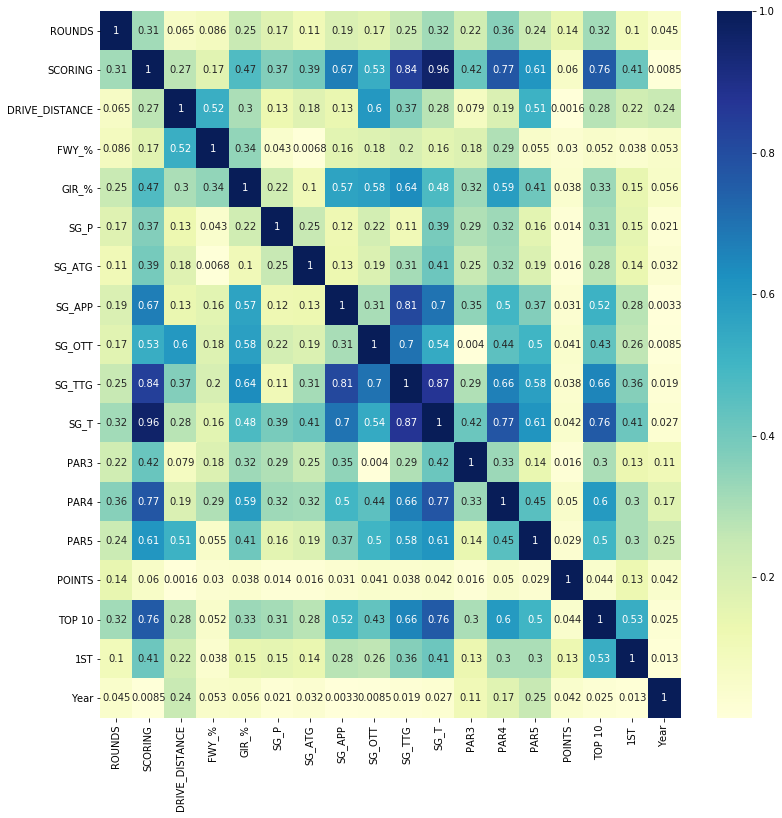

In [83]:
plt.figure(figsize=(13, 13))
sns.heatmap(df_pga.corr().abs(), annot=True, cmap="YlGnBu")

# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
plt.show() 

## **Distributions**

Here are my observations of the distributions:
*   Most the distributions are normally distributed. This allows me to do regression anaylsis. Points, TOP10s, and 1st are skewed to the right. 
*   There is a very small difference between being an outlier and being the average on the PGA Tour. This speaks to the level of competition, the depth and quality of players that are found within professional golf. For example on par three scoring, the difference between a 3.00 scoring average and 3.15 scoring average if the difference between being very good or very bad on par threes. TO put this into context, over the course of a PGA Tour tournament (4 Rounds), there will usually be around 16 Par 3s. The difference between going even par (3.00) and +2 (3.13) is very slim, yet over the course of a season, this is what separates the best from the worst. 

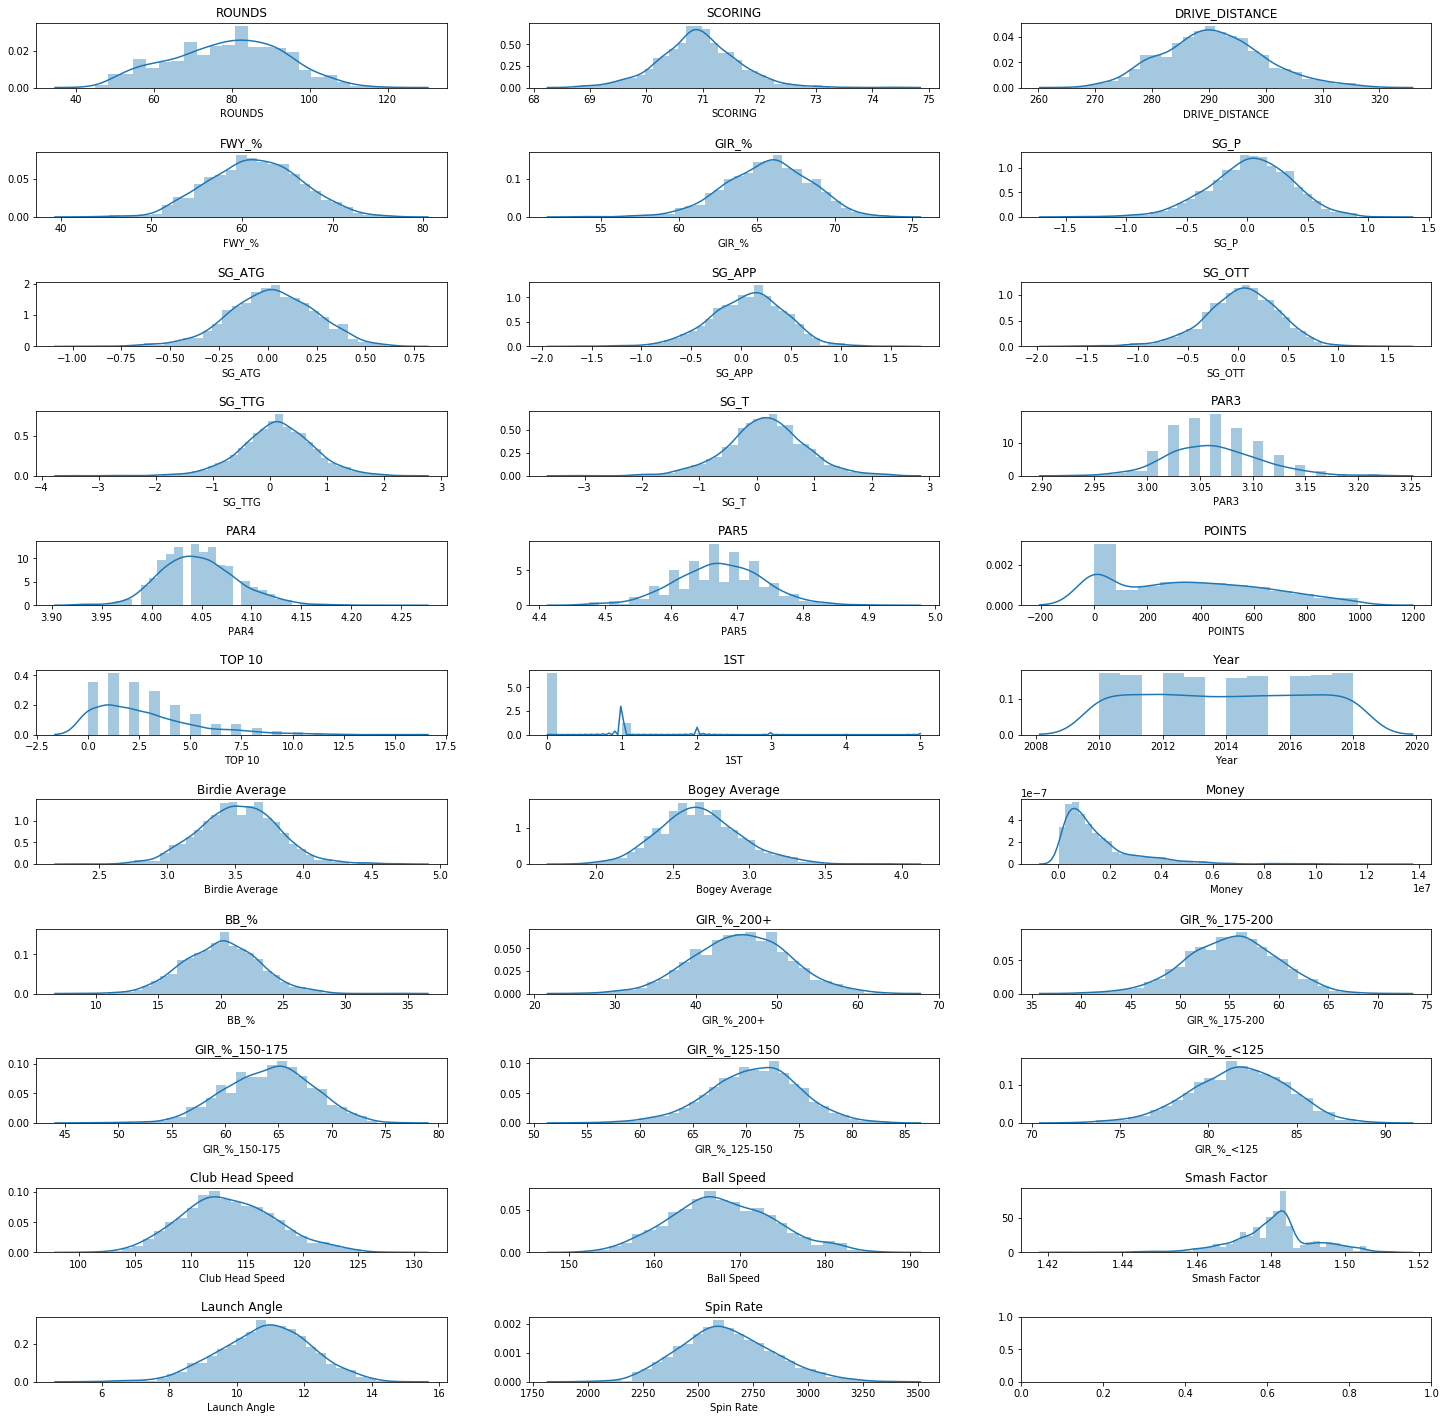

In [94]:
f, ax = plt.subplots(nrows = 11, ncols = 3, figsize=(25,25))
numeric_cols = df.select_dtypes(['int64', 'float64']).columns
row = 0
col = 0
for i, column in enumerate(numeric_cols):
    graph = sns.distplot(df[column], ax=ax[row][col])
    graph.set(title = column)
    col += 1
    if col == 3:
        col = 0
        row += 1
        
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=1)

Here are my observation for the Scoring column plotted aganist each numeric column within the dataframe
*   Most the statistics appear to show some trends when compared to scoring, however, some are stronger than the other. As found above, FWY_% is on the weak end of the spectrum while Stroked Gained Statistics and GIR_% are on the other end. 

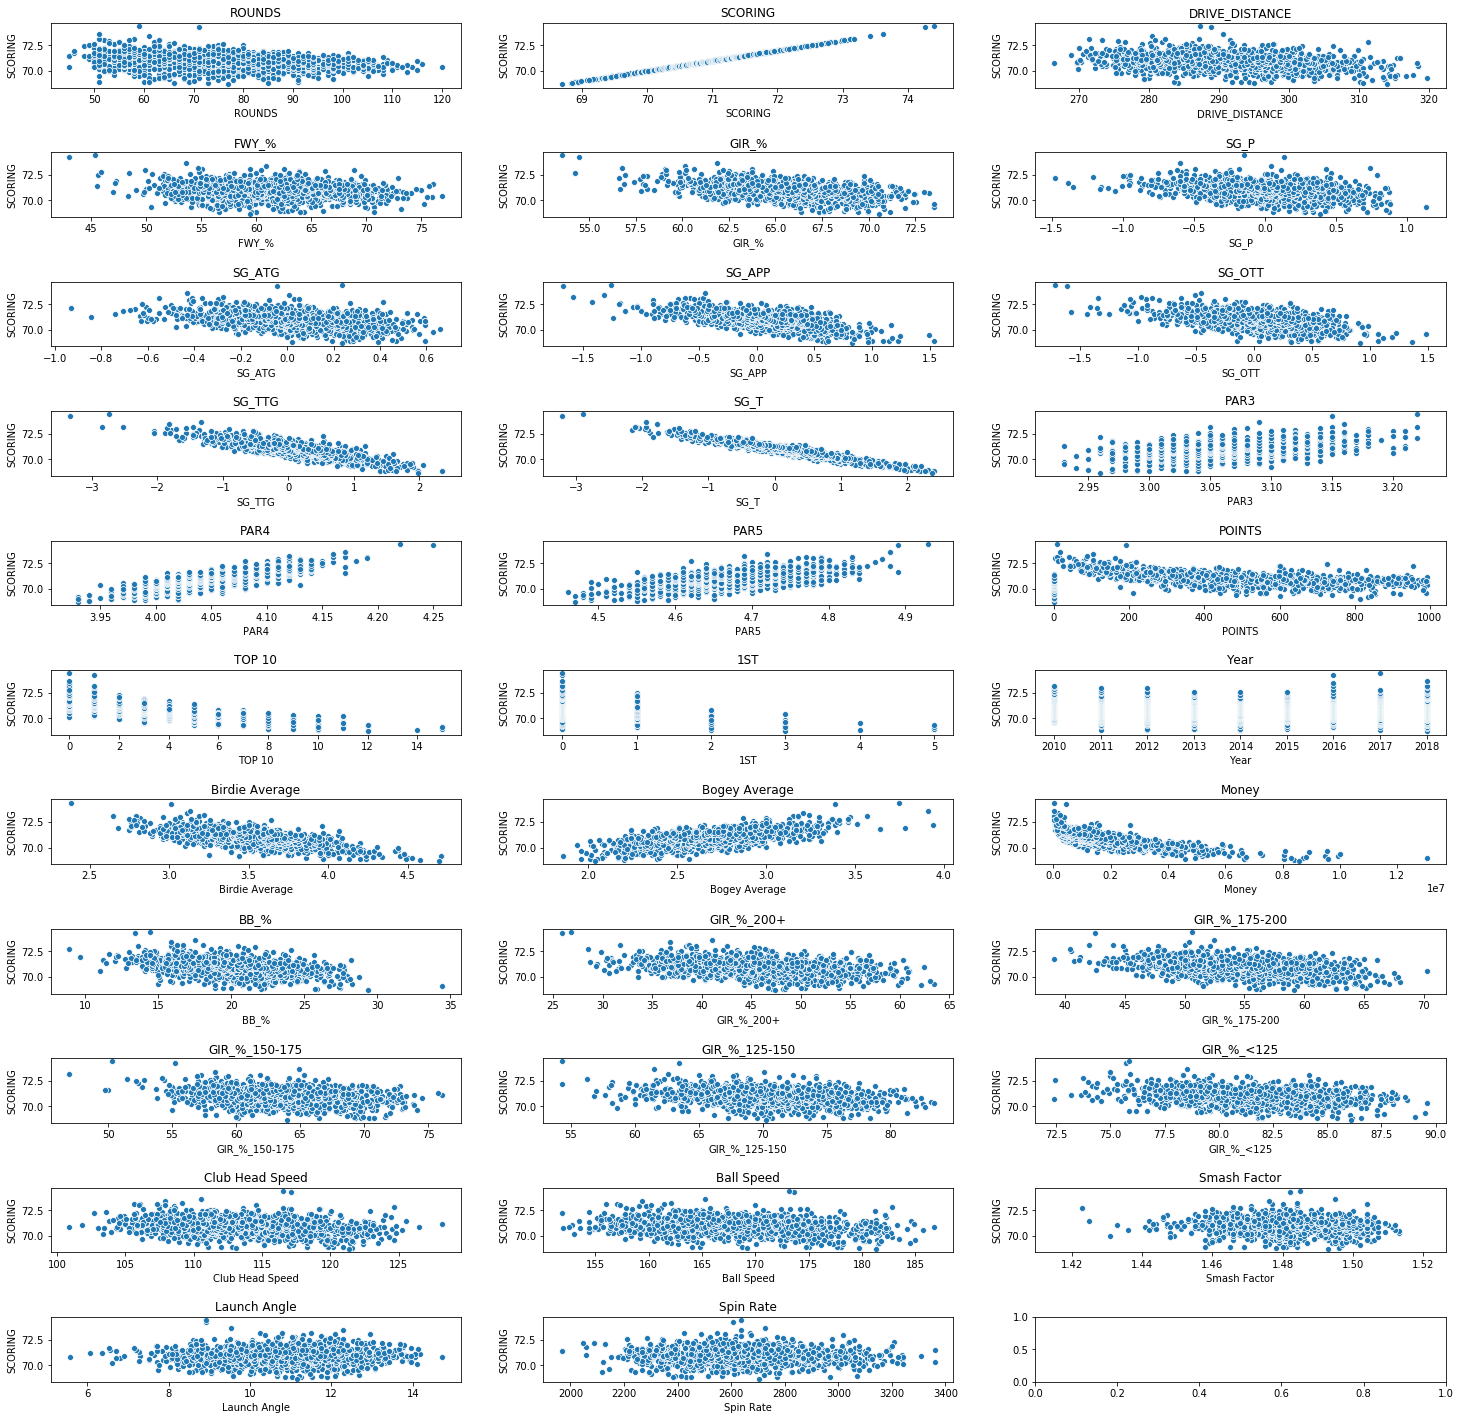

In [96]:
f, ax = plt.subplots(nrows = 11, ncols = 3, figsize=(25,25))
numeric_cols = df.select_dtypes(['int64', 'float64']).columns
row = 0
col = 0
for i, column in enumerate(numeric_cols):
    graph = sns.scatterplot(x=column, y="SCORING", data=df, ax=ax[row][col]);
    graph.set(title = column)
    col += 1
    if col == 3:
        col = 0
        row += 1
        
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=1)

## **Regression**

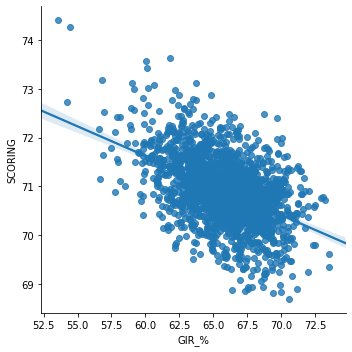

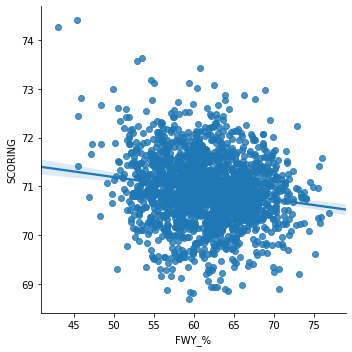

In [0]:
sns.lmplot(x='GIR_%', y='SCORING', data=df_pga)  
sns.lmplot(x='FWY_%', y='SCORING', data=df_pga)  

In [0]:
from sklearn.linear_model import LinearRegression

# features are the predictors or independent variables
features = df_pga[['FWY_%', 'GIR_%', 'DRIVE_DISTANCE']]

# the outcome is the result or the dependent variables 
outcome = df_pga['SCORING']

# fit (build) the model using the features and the outcome
scoringregression = LinearRegression().fit(features, outcome)

# the intercept is where the linear model will cross the y-axis (the expected
# value of y when x is zero)
print('The intercept for the regression model is: ', scoringregression.intercept_.round(2))

print('The coefficients for the features are:')
for x, y in zip(features.columns, scoringregression.coef_):
  print('\t', x, ':', y.round(2))

The intercept for the regression model is:  84.39
The coefficients for the features are:
	 FWY_% : -0.03
	 GIR_% : -0.08
	 DRIVE_DISTANCE : -0.02


In [0]:
# R-squared is one measurment of the amount of variance in the outcome that is
# accounted for by the model
print("This model's r-squared is:", scoringregression.score(features,outcome).round(2))

This model's r-squared is: 0.26


In [97]:
from scipy.stats import zscore

df_zscore = df.copy()
numeric_cols = df_zscore.select_dtypes(['int64', 'float64']).columns
df_zscore[numeric_cols] = df_zscore[numeric_cols].apply(zscore)

df_zscore.round(2)

,NAME,ROUNDS,SCORING,DRIVE_DISTANCE,FWY_%,GIR_%,SG_P,SG_ATG,SG_APP,SG_OTT,SG_TTG,SG_T,PAR3,PAR4,PAR5,POINTS,TOP 10,1ST,Year,Birdie Average,Bogey Average,Money,BB_%,GIR_%_200+,GIR_%_175-200,GIR_%_150-175,GIR_%_125-150,GIR_%_<125,Club Head Speed,Ball Speed,Smash Factor,Launch Angle,Spin Rate
0,Matt Kuchar,1.27,-1.87,-0.44,1.27,1.34,1.81,1.40,0.70,0.32,1.08,1.88,-0.98,-2.28,-1.70,-1.25,3.39,1.31,-1.53,1.52,-2.16,2.44,0.53,1.05,0.54,1.08,0.36,1.30,-0.64,-0.75,-0.44,-0.06,-0.68
1,Steve Stricker,-0.41,-1.80,-0.88,1.39,0.95,1.19,1.78,1.85,0.40,1.94,2.39,-1.65,-1.50,-1.40,-1.25,2.58,3.04,-1.53,1.24,-1.83,1.97,-0.78,0.96,0.39,1.68,2.09,0.59,-0.54,-0.62,-0.35,0.18,0.19
2,Retief Goosen,-0.27,-1.71,0.07,0.66,0.10,1.90,1.68,0.31,0.79,1.22,2.07,-0.52,-1.50,-1.10,-1.25,2.98,-0.41,-1.53,0.77,-2.02,1.37,0.18,0.75,0.81,-0.23,0.20,-0.22,0.44,0.45,0.01,-0.20,0.70
3,Paul Casey,-1.04,-1.71,0.38,-0.03,1.09,2.28,-0.60,1.09,0.47,0.71,1.81,-0.75,-1.76,-0.50,-1.25,1.76,-0.41,-1.53,1.21,-1.72,1.75,-0.47,1.15,2.04,0.63,-0.28,-0.27,1.41,1.35,-0.44,-0.40,-0.18
4,Jim Furyk,-0.20,-1.56,-1.66,1.89,0.52,1.09,1.55,1.50,0.29,1.60,2.03,-0.98,-1.50,0.40,-1.25,1.76,4.76,-1.53,0.39,-1.36,2.30,0.81,-0.05,1.74,0.59,0.53,0.84,-1.10,-1.21,-0.44,-0.62,0.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1673,Kyle Thompson,-2.02,2.51,-0.61,0.30,-1.18,-2.25,-0.16,-0.08,-1.50,-0.99,-2.03,2.18,0.84,1.75,-1.21,-1.10,-0.41,1.53,-0.90,2.68,-1.03,0.35,-0.73,-0.37,-2.00,-0.40,1.05,-1.71,-1.58,0.90,0.82,-1.63
1674,Zecheng Dou,-1.81,2.65,0.12,-1.32,-0.71,-2.01,-0.94,-0.87,-0.31,-1.02,-1.94,0.83,2.14,1.90,-1.17,-1.10,-0.41,1.53,-1.31,2.53,-0.99,-0.47,0.13,-1.81,-0.42,0.80,-2.45,0.73,-0.38,-5.14,0.14,0.66
1675,D.A. Points,-1.11,3.01,-1.12,-0.20,-1.99,0.24,0.13,-1.59,-2.90,-2.61,-2.30,1.73,1.88,1.30,-0.67,-0.69,-0.41,1.53,-1.55,2.28,-0.80,0.12,-0.52,-0.68,-1.17,-0.72,-0.17,-1.32,-1.29,0.27,0.92,-0.26
1676,Daniel Summerhays,-1.95,3.23,-0.41,-1.34,-3.23,2.06,-1.34,-4.33,-2.66,-4.60,-3.24,3.53,1.88,0.25,-0.93,-0.69,-0.41,1.53,-1.04,2.06,-0.89,-1.26,-2.37,-2.89,-4.22,-1.90,-2.15,-1.03,-0.98,0.27,-0.05,-0.40


## **Overall Observations**

# **Question 2: What is the difference between a great season on TOUR, an average season, and a bad season on TOUR? and where do these differences come from?**

Here, we create 3 seprate buckets of scoring averages for players on TOUR. One for players who average under 70, one for players who average between 70 and 71.5 and finally one for players who average over 71.5 

In [98]:
df_compare = pd.DataFrame()
df_compare['AVG < 70'] = df[df['SCORING'] < 70].mean()
df_compare['70 < AVG < 71.5'] = df[(df['SCORING'] > 70) & (df['SCORING'] < 71.5)].mean()
df_compare['AVG > 71.5'] = df[df['SCORING'] > 71.5].mean()
df_compare.round(2).transpose()

,ROUNDS,SCORING,DRIVE_DISTANCE,FWY_%,GIR_%,SG_P,SG_ATG,SG_APP,SG_OTT,SG_TTG,SG_T,PAR3,PAR4,PAR5,POINTS,TOP 10,1ST,Year,Birdie Average,Bogey Average,Money,BB_%,GIR_%_200+,GIR_%_175-200,GIR_%_150-175,GIR_%_125-150,GIR_%_<125,Club Head Speed,Ball Speed,Smash Factor,Launch Angle,Spin Rate
AVG < 70,77.16,69.62,296.59,61.96,67.76,0.26,0.21,0.53,0.40,1.14,1.40,3.03,4.00,4.58,268.97,7.47,1.08,2014.16,3.92,2.38,4720487.13,22.12,49.61,58.57,65.65,72.41,82.81,115.87,171.71,1.48,10.84,2622.53
70 < AVG < 71.5,81.76,70.82,290.91,61.84,66.00,0.05,0.03,0.10,0.07,0.20,0.25,3.06,4.04,4.67,391.83,2.64,0.18,2014.03,3.55,2.64,1461546.30,20.26,45.95,55.53,64.49,71.06,81.95,113.47,168.09,1.48,10.85,2636.26
AVG > 71.5,67.80,71.95,287.50,59.65,63.37,-0.17,-0.09,-0.30,-0.28,-0.67,-0.84,3.09,4.10,4.73,231.88,0.64,0.05,2013.77,3.24,2.98,436802.33,18.33,42.31,52.41,61.91,68.74,80.33,112.25,166.07,1.48,10.89,2624.33


## **Observations**
* Here, we can observe that once again, ball-striking is king. There is a large difference is Strokes Gained-Tee to Green between each of the bucket which represents that majority of the differences between each bucket. 
* There is also a difference between driving distance between each of the groups. The difference between the top bucket and the bottom bucket is about 10 yards. According to Mark Broadie's Every Shot Counts, an extra ten yards equates to approximately 0.1 shots gained. Over the course of a round where you are hitting driver about 14 times, that equates to 1.4 shot gained just due to distance. This once again reinforces that ball striking and distance is king on the PGA TOUR. 

In [0]:
df_winners = pd.DataFrame()
df_winners['Winners'] = df_pga[df_pga['1ST'] > 0.5].mean()
df_winners['Others'] = df_pga[df_pga['1ST'] == 0].mean()
df_winners.round(2).transpose()

,ROUNDS,SCORING,DRIVE_DISTANCE,FWY_%,GIR_%,SG_P,SG_ATG,SG_APP,SG_OTT,SG_TTG,SG_T,PAR3,PAR4,PAR5,POINTS,TOP 10,1ST,Year
Winners,82.48,70.41,294.72,61.31,66.35,0.11,0.07,0.25,0.22,0.54,0.65,3.05,4.03,4.63,297.77,5.04,1.27,2014.56
Others,77.64,71.05,290.38,61.62,65.63,0.01,0.01,0.02,-0.00,0.03,0.03,3.06,4.05,4.68,360.59,2.14,0.00,2014.50


# **Question 3: Player improvement on the PGA TOUR**

In [99]:
df_byyear = pd.DataFrame()

for year in range(2010, 2019):
  df_byyear[year] = df[df['Year'] == year].mean()

df_byyear.transpose().round(2)

,ROUNDS,SCORING,DRIVE_DISTANCE,FWY_%,GIR_%,SG_P,SG_ATG,SG_APP,SG_OTT,SG_TTG,SG_T,PAR3,PAR4,PAR5,POINTS,TOP 10,1ST,Year,Birdie Average,Bogey Average,Money,BB_%,GIR_%_200+,GIR_%_175-200,GIR_%_150-175,GIR_%_125-150,GIR_%_<125,Club Head Speed,Ball Speed,Smash Factor,Launch Angle,Spin Rate
2010,79.39,71.00,287.39,63.41,66.92,0.01,0.01,0.05,0.02,0.08,0.09,3.06,4.04,4.70,320.83,2.59,0.21,2010.0,3.51,2.59,1348970.25,20.35,48.31,56.31,65.37,71.70,82.39,112.79,166.36,1.47,10.67,2717.76
2011,78.03,70.87,291.05,61.82,65.53,0.03,0.02,0.06,0.04,0.11,0.15,3.07,4.05,4.67,320.86,2.59,0.23,2011.0,3.51,2.72,1471145.18,19.93,45.62,54.93,63.85,70.73,81.62,113.10,167.23,1.48,10.79,2671.76
2012,77.62,70.89,290.00,61.05,64.89,0.02,0.02,0.07,0.04,0.12,0.14,3.07,4.06,4.68,325.75,2.70,0.24,2012.0,3.45,2.78,1475796.47,19.71,44.96,54.53,63.75,71.02,82.10,113.39,167.73,1.48,10.89,2694.06
2013,72.19,70.93,287.88,61.32,65.00,0.03,0.01,0.06,0.03,0.10,0.13,3.07,4.06,4.68,352.60,2.56,0.22,2013.0,3.44,2.76,1362543.12,19.39,44.52,54.63,63.76,70.81,81.96,113.58,168.03,1.48,10.86,2641.54
2014,79.56,70.83,289.95,61.58,65.00,0.02,0.03,0.10,0.06,0.19,0.21,3.07,4.05,4.68,366.57,2.77,0.25,2014.0,3.47,2.72,1639799.63,19.55,43.88,54.34,64.80,70.78,81.60,113.48,167.85,1.48,11.00,2624.29
2015,81.67,70.94,290.29,61.91,66.33,0.02,0.03,0.07,0.04,0.15,0.16,3.05,4.04,4.66,368.83,2.81,0.24,2015.0,3.61,2.59,1606729.46,20.80,46.20,55.98,64.29,71.11,81.58,113.49,168.07,1.48,10.80,2591.39
2016,79.48,71.00,290.89,60.23,65.58,0.02,0.03,0.07,0.03,0.13,0.16,3.06,4.05,4.67,383.97,2.68,0.23,2016.0,3.53,2.65,1600507.15,19.98,45.86,55.01,63.97,71.07,81.27,113.16,168.07,1.49,10.54,2540.92
2017,80.78,70.92,292.69,60.33,65.39,0.03,0.03,0.06,0.03,0.13,0.16,3.06,4.05,4.67,374.04,2.76,0.25,2017.0,3.55,2.67,1712018.33,20.12,44.89,55.48,63.18,68.61,81.19,114.13,169.30,1.48,11.05,2574.01
2018,80.73,70.87,296.72,61.46,66.39,0.05,0.03,0.07,0.04,0.14,0.20,3.06,4.03,4.64,361.44,2.81,0.26,2018.0,3.65,2.63,1810919.19,20.78,46.14,55.73,64.19,71.01,81.89,114.04,169.69,1.49,11.06,2635.80


**Observations**

- Driving Distance has been increasing gradually over the last ten years. This is something I plan to examine further to determine what caused the increase in distance. Two possibile explanations are an improvement in technology or an improvement in player fitness/clubhead speed.
- Par 5 scoring has improved over the last ten years and I believe this is due to the increase in distance. An increase of approxiamtely ten yards should equate to 0.1 shots lower which is what we are seeing.

# **Question 4: Examining individual players game**



## **Jordan Spieth**

Jordan Spieth is one the most popular players on the PGA TOUR. He had one of the greatest seasons in TOUR history in 2015 when he won 2 majors and 5 times total. He reached number one in the Official World Golf Ranking but since then, his game has been on the decline to today where he is now currently ranked 42nd. 

In [100]:
df_jordanspieth = df[df['NAME'] == 'Jordan Spieth']
df_jordanspieth

,NAME,ROUNDS,SCORING,DRIVE_DISTANCE,FWY_%,GIR_%,SG_P,SG_ATG,SG_APP,SG_OTT,SG_TTG,SG_T,PAR3,PAR4,PAR5,POINTS,TOP 10,1ST,Year,Birdie Average,Bogey Average,Money,BB_%,GIR_%_200+,GIR_%_175-200,GIR_%_150-175,GIR_%_125-150,GIR_%_<125,Club Head Speed,Ball Speed,Smash Factor,Launch Angle,Spin Rate
577,Jordan Spieth,82,69.668,289.4,67.80,66.94,0.182,0.200,0.480,0.611,1.291,1.473,3.05,3.99,4.62,0.0,9.0,1.0,2013,3.89,2.35,3879820.0,20.09,51.32,58.65,61.90,70.30,81.57,111.93,166.08,1.484,10.63,2356.0
762,Jordan Spieth,102,69.946,289.7,58.79,62.47,0.399,0.260,0.286,0.034,0.581,0.980,3.02,4.02,4.63,698.0,8.0,0.0,2014,3.97,2.68,4448248.0,21.72,41.59,49.46,57.03,61.84,82.16,111.56,165.55,1.484,11.39,2299.4
926,Jordan Spieth,91,68.938,291.8,62.91,67.87,0.571,0.471,0.618,0.494,1.583,2.154,2.99,3.93,4.59,0.0,15.0,5.0,2015,4.50,2.08,13030465.0,27.46,46.71,55.35,60.00,68.65,82.01,112.79,168.77,1.496,11.74,2565.8
1113,Jordan Spieth,80,69.520,295.4,58.14,63.52,0.758,0.264,0.145,0.402,0.811,1.569,3.06,3.98,4.54,0.0,8.0,2.0,2016,4.26,2.37,5713470.0,22.87,44.76,51.14,61.06,71.19,80.24,111.86,168.42,1.505,11.67,2268.7
1295,Jordan Spieth,85,68.846,295.0,59.48,69.97,0.278,0.393,0.963,0.321,1.646,1.988,3.00,3.93,4.59,0.0,12.0,3.0,2017,4.49,2.05,9573033.0,25.73,48.37,62.63,69.72,67.33,85.45,113.11,169.18,1.496,11.88,2449.2
1502,Jordan Spieth,81,69.904,299.8,61.55,70.47,-0.034,0.184,0.409,0.271,0.863,0.830,3.05,3.97,4.55,0.0,5.0,0.0,2018,4.16,2.22,3006036.0,21.59,46.05,61.05,72.17,74.29,84.18,113.44,170.46,1.502,12.26,2335.6


In [101]:
df_mean.transpose().round(2)

,ROUNDS,SCORING,DRIVE_DISTANCE,FWY_%,GIR_%,SG_P,SG_ATG,SG_APP,SG_OTT,SG_TTG,SG_T,PAR3,PAR4,PAR5,POINTS,TOP 10,1ST,Year,Birdie Average,Bogey Average,Money,BB_%,GIR_%_200+,GIR_%_175-200,GIR_%_150-175,GIR_%_125-150,GIR_%_<125,Club Head Speed,Ball Speed,Smash Factor,Launch Angle,Spin Rate
PGA_AVG,78.85,70.92,290.79,61.46,65.68,0.03,0.02,0.07,0.04,0.13,0.15,3.06,4.05,4.67,352.48,2.7,0.24,2014.0,3.53,2.68,1558970.31,20.08,45.62,55.23,64.13,70.76,81.74,113.46,168.04,1.48,10.85,2633.05


Text(0.5, 1.0, 'Jordan Spieth Scoring Average (2013-2019)')

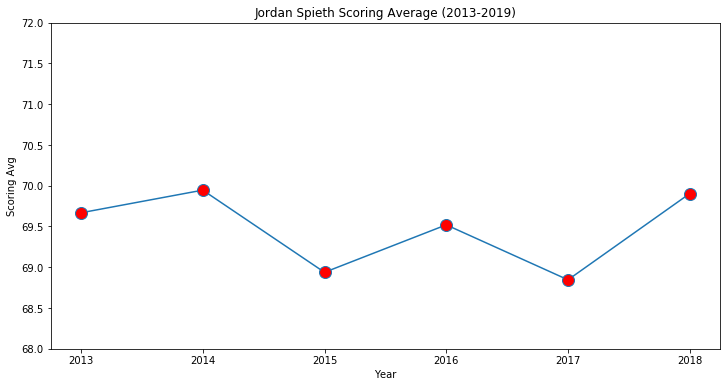

In [102]:
plt.figure(figsize=(12, 6))
plt.plot(df_jordanspieth.groupby('Year').mean()['SCORING'], marker='o', markerfacecolor='red', markersize = 12)
plt.xlabel('Year')
plt.ylim(ymin = 68, ymax=72)
plt.ylabel('Scoring Avg')
plt.title('Jordan Spieth Scoring Average (2013-2019)')

Text(0.5, 1.0, 'Jordan Spieth Strokes Gained-Tee to Green (2013-2019)')

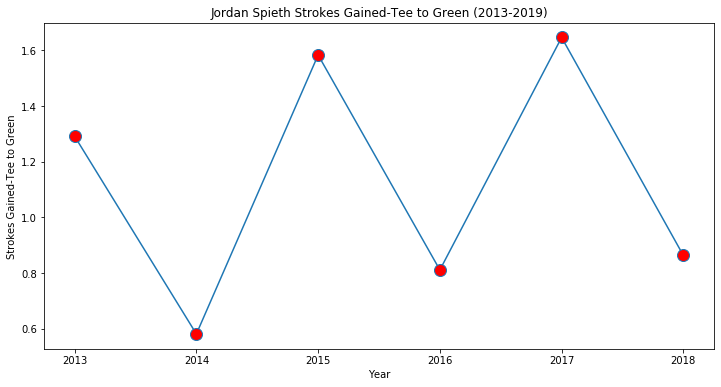

In [103]:
plt.figure(figsize=(12, 6))
plt.plot(df_jordanspieth.groupby('Year').mean()['SG_TTG'], marker='o', markerfacecolor='red', markersize = 12)
plt.xlabel('Year')
plt.ylabel('Strokes Gained-Tee to Green')
plt.title('Jordan Spieth Strokes Gained-Tee to Green (2013-2019)')

### **Oberservations**
* For Jordan, there was the narrative that one reason why he struggled with his putting was due to having the 'yips'. However, his putting has very little correlation with his scoring average for the year. The truth is that the decline in Jordan's game comes from his ball striking. As shown above, the years where Jordan has the lowest scoring average are the years where is Strokes Gained-Tee to Green is the highest. They flucuate together.

In [104]:
df_jordanspieth_zscore = df_zscore[df_zscore['NAME'] == 'Jordan Spieth']
df_jordanspieth_zscore.round(2)

,NAME,ROUNDS,SCORING,DRIVE_DISTANCE,FWY_%,GIR_%,SG_P,SG_ATG,SG_APP,SG_OTT,SG_TTG,SG_T,PAR3,PAR4,PAR5,POINTS,TOP 10,1ST,Year,Birdie Average,Bogey Average,Money,BB_%,GIR_%_200+,GIR_%_175-200,GIR_%_150-175,GIR_%_125-150,GIR_%_<125,Club Head Speed,Ball Speed,Smash Factor,Launch Angle,Spin Rate
577,Jordan Spieth,0.22,-1.78,-0.16,1.25,0.46,0.45,0.80,1.08,1.50,1.80,1.89,-0.30,-1.50,-0.80,-1.25,2.58,1.31,-0.38,1.24,-1.21,1.56,0.00,0.97,0.75,-0.55,-0.11,-0.06,-0.37,-0.32,0.27,-0.17,-1.31
762,Jordan Spieth,1.62,-1.39,-0.12,-0.53,-1.17,1.08,1.07,0.57,-0.01,0.70,1.19,-0.98,-0.72,-0.65,1.22,2.17,-0.41,0.00,1.52,0.00,1.94,0.54,-0.69,-1.26,-1.75,-2.08,0.16,-0.45,-0.41,0.27,0.40,-1.57
926,Jordan Spieth,0.85,-2.83,0.11,0.29,0.80,1.58,2.02,1.44,1.20,2.25,2.87,-1.65,-3.05,-1.25,-1.25,5.03,8.21,0.38,3.32,-2.20,7.72,2.44,0.19,0.03,-1.02,-0.49,0.10,-0.16,0.12,1.34,0.66,-0.32
1113,Jordan Spieth,0.08,-2.00,0.52,-0.66,-0.78,2.13,1.09,0.20,0.96,1.06,2.03,-0.07,-1.76,-2.00,-1.25,2.17,3.04,0.77,2.51,-1.14,2.79,0.92,-0.15,-0.89,-0.76,0.10,-0.55,-0.38,0.06,2.14,0.61,-1.72
1295,Jordan Spieth,0.43,-2.96,0.47,-0.39,1.56,0.73,1.67,2.35,0.74,2.35,2.63,-1.43,-3.05,-1.25,-1.25,3.80,4.76,1.15,3.29,-2.31,5.39,1.87,0.47,1.62,1.38,-0.80,1.37,-0.08,0.19,1.34,0.77,-0.87
1502,Jordan Spieth,0.15,-1.45,1.01,0.02,1.74,-0.17,0.73,0.90,0.61,1.14,0.97,-0.30,-2.02,-1.85,-1.25,0.94,-0.41,1.53,2.17,-1.69,0.97,0.50,0.07,1.27,1.98,0.82,0.90,-0.01,0.40,1.87,1.05,-1.40


**Future**
* Pull in additional data to find specifically where Jordan is struggling. EX: Is it from 100-125 yards... or off the tee, does he have a two way miss?

In [105]:
df_jordanspieth.corr()['SCORING'].abs().sort_values(ascending=False)

SCORING            1.000000
SG_T               0.951799
1ST                0.918987
Money              0.911944
SG_ATG             0.891972
PAR4               0.890444
BB_%               0.885070
SG_TTG             0.882350
TOP 10             0.879296
Birdie Average     0.864719
Spin Rate          0.801846
Bogey Average      0.785469
SG_APP             0.759165
PAR3               0.710126
POINTS             0.490388
GIR_%              0.403098
SG_OTT             0.399306
Club Head Speed    0.394600
GIR_%_200+         0.376627
Ball Speed         0.357092
GIR_%_175-200      0.349477
SG_P               0.341370
GIR_%_<125         0.292333
Smash Factor       0.239296
Launch Angle       0.191596
Year               0.173003
GIR_%_150-175      0.125814
ROUNDS             0.115727
PAR5               0.059692
GIR_%_125-150      0.048288
FWY_%              0.037723
DRIVE_DISTANCE     0.018657
Name: SCORING, dtype: float64